# 4 Loai Banh

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [4]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [5]:
train_set=train.flow_from_directory('/content/drive/MyDrive/AI(4loaibanh)/train',target_size = (150,150),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/AI(4loaibanh)/validation',target_size = (150,150),batch_size = 12,class_mode = 'categorical')

Found 79 images belonging to 4 classes.
Found 33 images belonging to 4 classes.


In [6]:
train_set.class_indices

{'Banhdalon': 0, 'Banhhoi': 1, 'Banhuot': 2, 'Banhxeo': 3}

In [7]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape =(150,150,3)),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(4,activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [8]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
history = model.fit(train_set,batch_size=32,epochs=20,verbose=1,validation_data=test_set)

Epoch 1/20
7/7 [==============================] - 53s 8s/step - loss: 1.7968 - accuracy: 0.3418 - val_loss: 1.4432 - val_accuracy: 0.3333
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 1.5212 - accuracy: 0.2405 - val_loss: 1.3969 - val_accuracy: 0.2727
Epoch 3/20
7/7 [==============================] - 11s 2s/step - loss: 1.3805 - accuracy: 0.2911 - val_loss: 1.4409 - val_accuracy: 0.1818
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 1.3280 - accuracy: 0.2785 - val_loss: 1.3107 - val_accuracy: 0.4242
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 1.2878 - accuracy: 0.4430 - val_loss: 1.2419 - val_accuracy: 0.4242
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 1.1768 - accuracy: 0.4430 - val_loss: 1.0770 - val_accuracy: 0.4545
Epoch 7/20
7/7 [==============================] - 10s 2s/step - loss: 1.0575 - accuracy: 0.5063 - val_loss: 0.9439 - val_accuracy: 0.4545
Epoch 8/20
7/7 [==================

In [11]:
score=model.evaluate(test_set,verbose=1)

print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

3/3 [==============================] - 1s 290ms/step - loss: 0.9867 - accuracy: 0.5152
Sai số:  0.9866679906845093
Độ chính xác:  0.5151515007019043


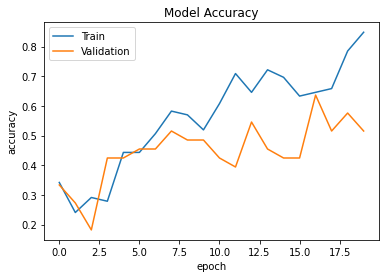

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [13]:
model.save('Banh.h5')

In [14]:
from tensorflow.keras.models import load_model
model1=load_model('Banh.h5')

Banhdalon


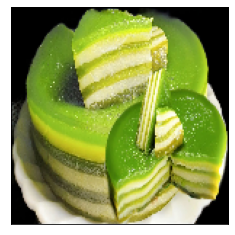

In [17]:
classes=['Banhdalon','Banhhoi','Banhuot','Banhxeo']
img=load_img('/content/drive/MyDrive/AI(4loaibanh)/test/Banhdalon/4.jpg',target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Banhuot


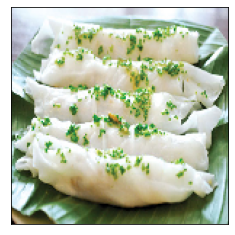

In [20]:
img=load_img('/content/drive/MyDrive/AI(4loaibanh)/test/Banhuot/1.jpg',target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])